(60000, 28, 28)
(10000, 28, 28)
GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


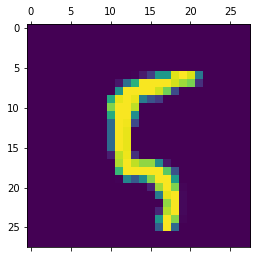

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# scale the model!!!
X_train = X_train / 255
X_test = X_test / 255

plt.matshow(X_train[100])
print(X_train.shape)
print(X_test.shape)

print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

In [31]:
# flatten training dataset: from 28 x 28 to 1 x 784 array
X_train_flatten = X_train.reshape(len(X_train), 28 * 28)
X_test_flatten = X_test.reshape(len(X_test), 28 * 28)

# def the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28 * 28, )), # so that we don't need to flatten our data
    keras.layers.Dense(200, activation='relu'), # input layer, try 100 units
    keras.layers.Dense(10, activation='sigmoid') # hidden layer
])


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy']) # 1 hot encoded array (also can use mean_square_error)

# train the model
model.fit(X_train_flatten, y_train, epochs=8)


Epoch 1/8
1875/1875 [==============================] - 2s 898us/step - loss: 0.2413 - accuracy: 0.9317
Epoch 2/8
1875/1875 [==============================] - 2s 887us/step - loss: 0.0996 - accuracy: 0.9702
Epoch 3/8
1875/1875 [==============================] - 2s 892us/step - loss: 0.0665 - accuracy: 0.9792
Epoch 4/8
1875/1875 [==============================] - 2s 898us/step - loss: 0.0482 - accuracy: 0.9850
Epoch 5/8
1875/1875 [==============================] - 2s 896us/step - loss: 0.0367 - accuracy: 0.9885
Epoch 6/8
1875/1875 [==============================] - 2s 903us/step - loss: 0.0280 - accuracy: 0.9912
Epoch 7/8
1875/1875 [==============================] - 2s 914us/step - loss: 0.0215 - accuracy: 0.9932
Epoch 8/8
1875/1875 [==============================] - 2s 903us/step - loss: 0.0176 - accuracy: 0.9945


In [37]:
# evaluate the model
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 884us/step - loss: 0.0725 - accuracy: 0.9782


[0.07246489077806473, 0.9782000184059143]

0


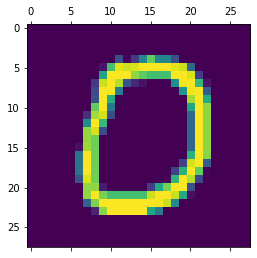

In [33]:
# predict the model
y_predicted = model.predict(X_test_flatten)

plt.matshow(X_test[10])
print(np.argmax(y_predicted[10])) # prediction

Text(69.0, 0.5, 'Actual')

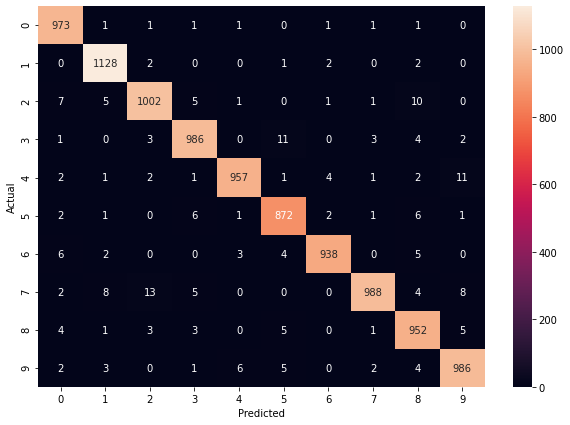

In [34]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test, predictions=[np.argmax(i) for i in y_predicted])

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")